In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

from lexical_reflections.utils.device import DEVICE

model = AutoModelForCausalLM.from_pretrained("google/gemma-3-1b-it")
model.to(DEVICE)
model.eval()
tokenizer = AutoTokenizer.from_pretrained("google/gemma-3-1b-it")

In [3]:
from lexical_reflections.preprocess_data.flores_plus import load_flores_plus

train_df, test_df = load_flores_plus(["eng_Latn", "rus_Cyrl"], {"eng_Latn": "en", "rus_Cyrl": "ru"}, train_size=50)

test_df = test_df[:100]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

In [4]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language

hidden_space_by_language = collect_hidden_space_by_language(model, tokenizer, train_df)

Data len:  50


100%|██████████| 50/50 [00:09<00:00,  5.46it/s]


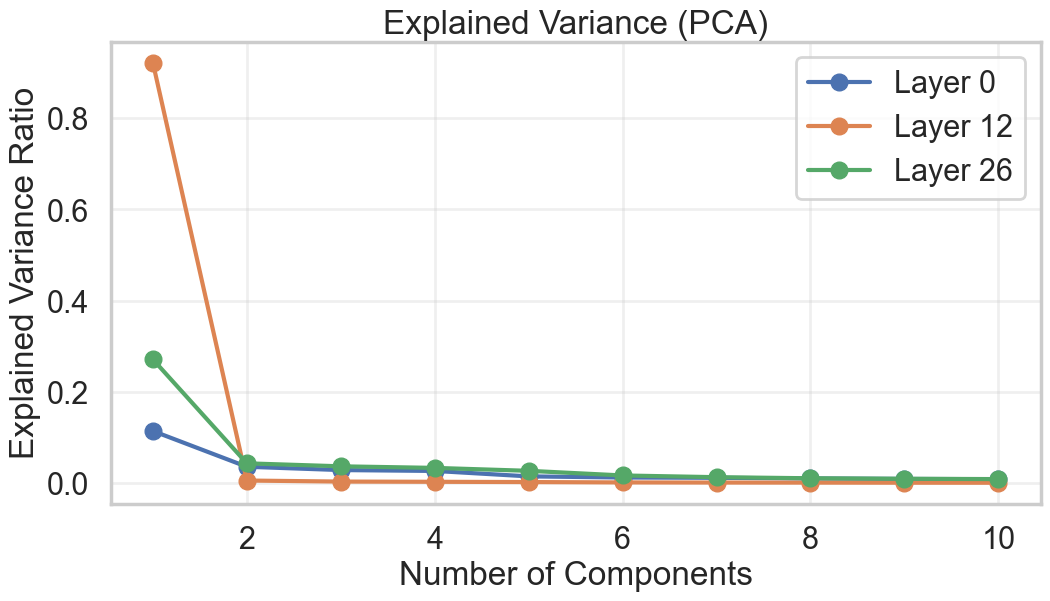

In [5]:
from lexical_reflections.pca.process_hidden_space import extract_pca_components, project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance

pca_components, pca_means, explained_variance_ratios = extract_pca_components(hidden_space_by_language)
projections = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

visualize_explained_variance(pca_components, explained_variance_ratios)

Data len:  100


100%|██████████| 100/100 [00:22<00:00,  4.39it/s]


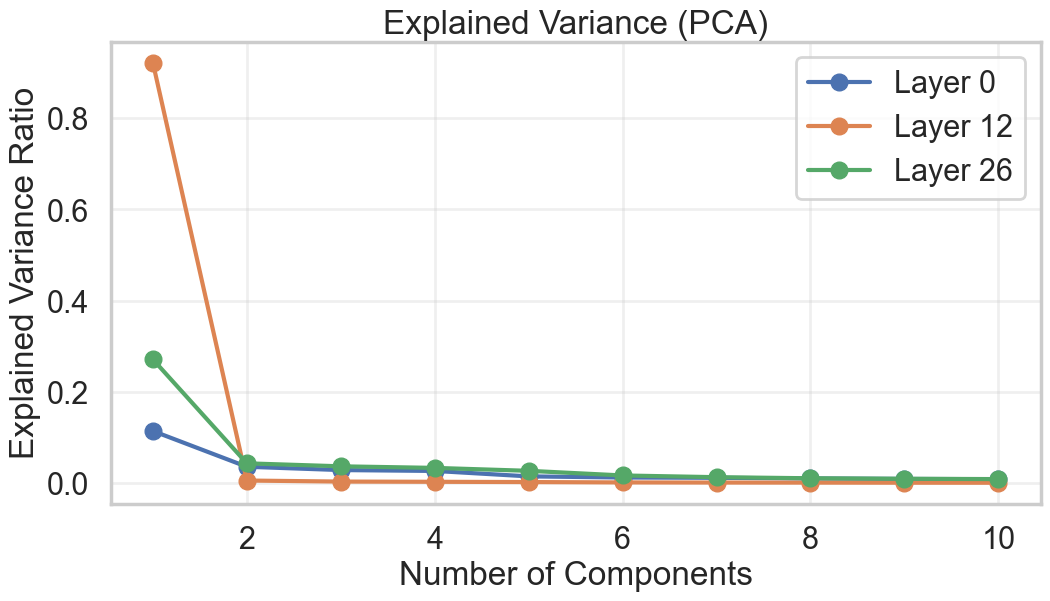

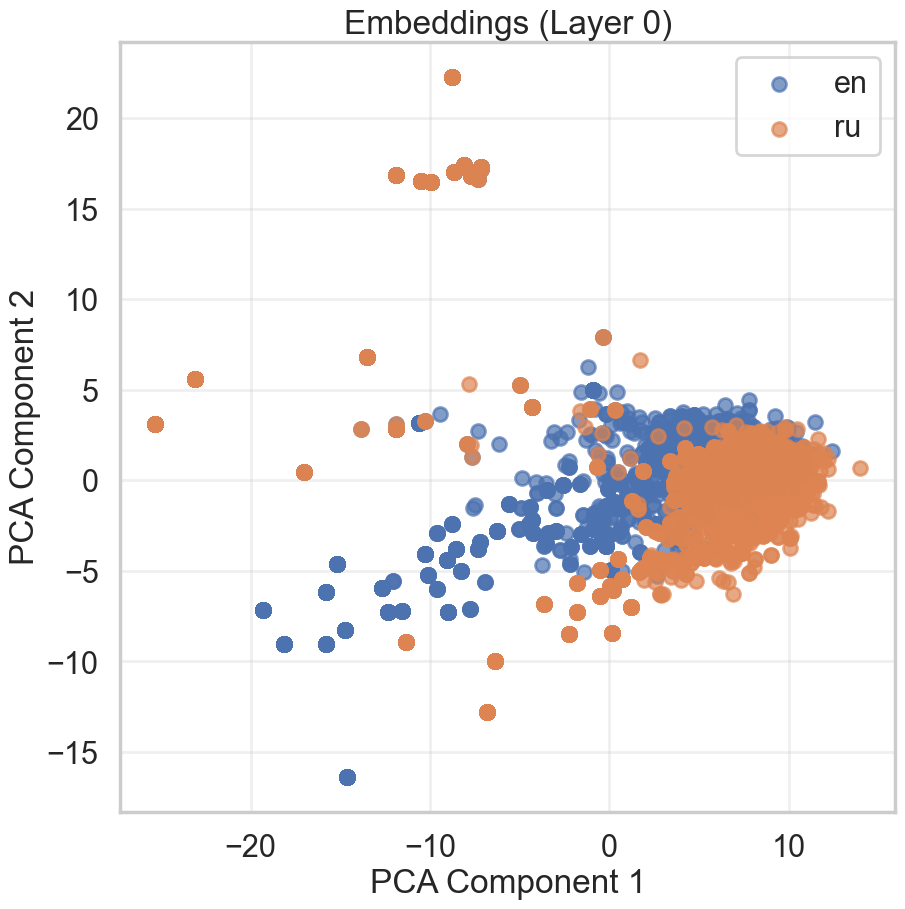

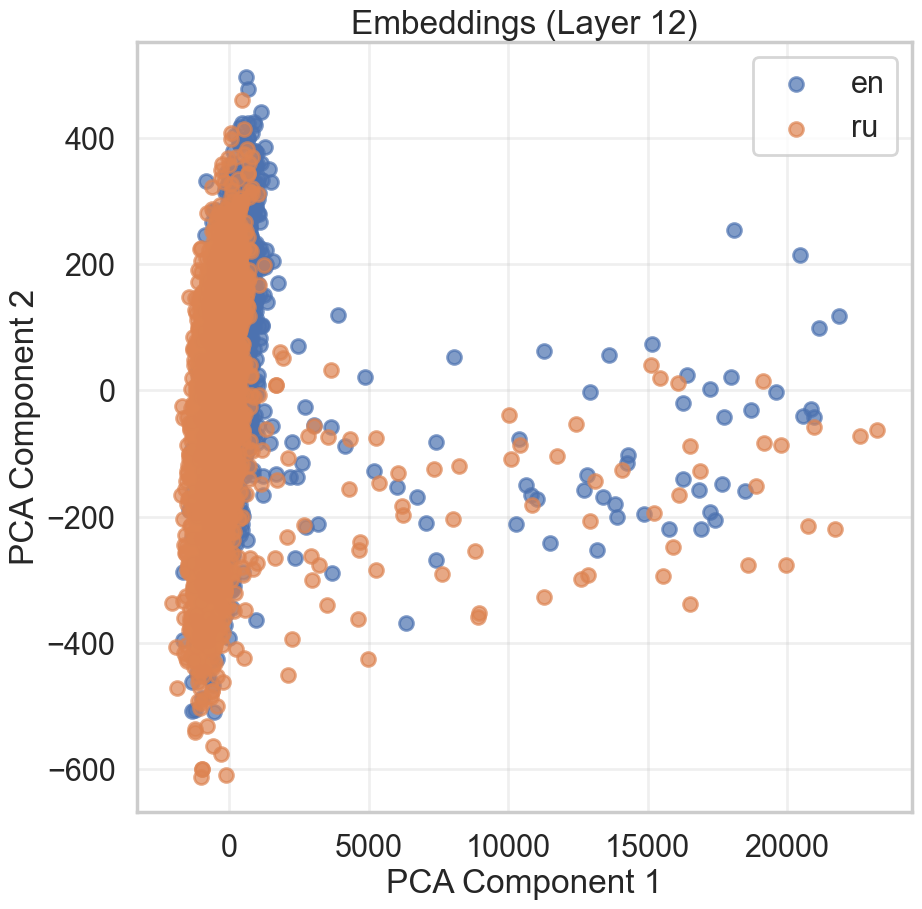

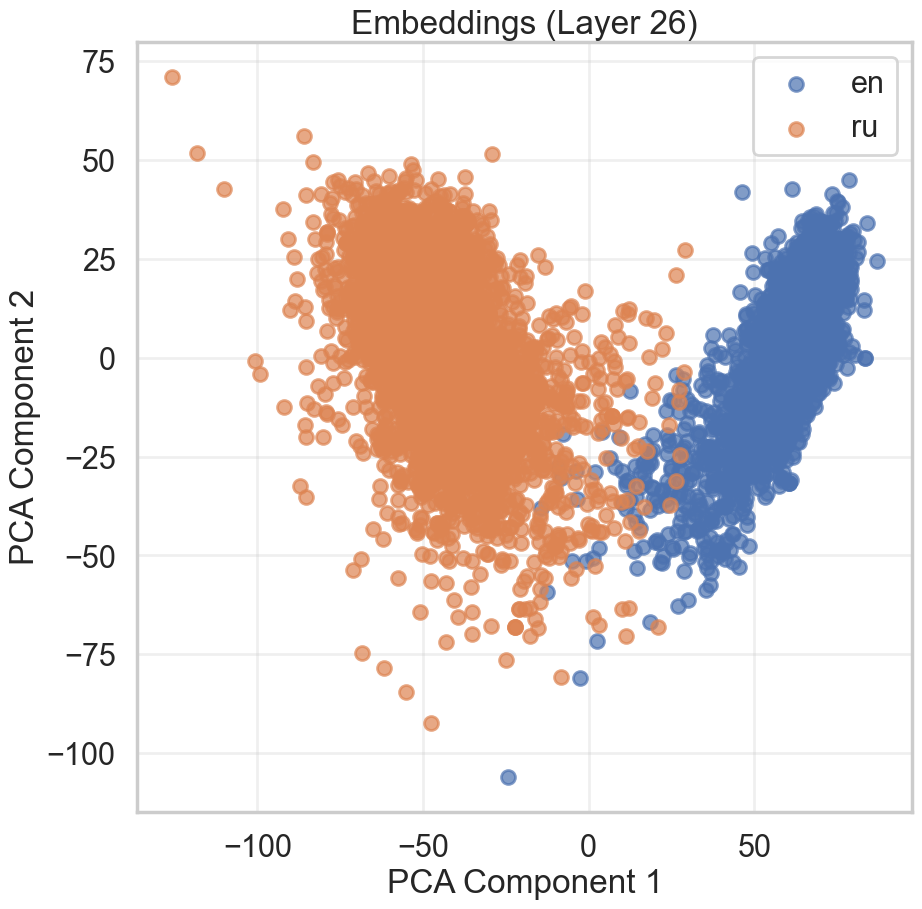

In [6]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language
from lexical_reflections.pca.analyze import project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance, visualize_projections

hidden_space_by_language = collect_hidden_space_by_language(model, tokenizer, test_df)

projections, _ = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

visualize_explained_variance(pca_components, explained_variance_ratios)
visualize_projections(hidden_space_by_language, projections)